In [62]:
### importando os modulos
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plot
import mplcyberpunk as mpl
import smtplib
from email.message import EmailMessage

In [63]:
### pegando dados do yahoo finance
actives = '^BVSP', 'BRL=X'
today = datetime.datetime.now()
one_year_ago = today - datetime.timedelta(days=365)

data = yf.download(actives, one_year_ago, today)

display(data.head())

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-04-05    4.5938  118885.0  4.5938  118885.0  4.6691  121628.0  4.575500   
2022-04-06    4.6507  118228.0  4.6507  118228.0  4.7126  118885.0  4.647900   
2022-04-07    4.7152  118862.0  4.7152  118862.0  4.7699  119247.0  4.690400   
2022-04-08    4.7521  118322.0  4.7521  118322.0  4.7913  118868.0  4.707518   
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.7326  118320.0  4.684016   

                        Open           Volume              
               ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                       
2022-04-05  118794.0  4.5938  121279.0      0  11788300.0  
2022-04-06  116791.0  4.6507  118885.0      0  13410800.0  
2022-04-07  117509.0  4.7152  118226.0      0  11520100.0  
2022-04-08  117487.0  4.7521  118861.0      0  11225800.0  
2022-04-11  116953.0  4.6980  118320.0      0   9558400.0

In [64]:
### manipulando os dados
closing_data = data['Adj Close'].dropna()
closing_data.columns = ['Dolar', 'Ibovespa']

closing_data.head()

,Dolar,Ibovespa
Date,,
2022-04-05,4.5938,118885.0
2022-04-06,4.6507,118228.0
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
2022-04-11,4.6981,116953.0


In [65]:
### criando tabelas com outros timeframes
monthly_closing = closing_data.resample('M').last()
annual_closing = closing_data.resample('Y').last()

In [66]:
### calcular fechamento do dia, retorno anual e retorno mensal
day_closing_return = closing_data.pct_change().dropna()
monthly_closing_return = monthly_closing.pct_change().dropna()
annual_closing_return = annual_closing.pct_change().dropna()

In [67]:
### fechamento dia anterior, mes e ano
dollar_last_day_return = round(day_closing_return.iloc[-1, 0] * 100, 2)
ibovespa_last_day_return = round(day_closing_return.iloc[-1, 1] * 100, 2)

dollar_last_month_return = round(monthly_closing_return.iloc[-1, 0] * 100, 2)
ibovespa_last_month_return = round(monthly_closing_return.iloc[-1, 1] * 100, 2)

dollar_last_year_return = round(annual_closing_return.iloc[-1, 0] * 100, 2)
ibovespa_last_year_return = round(annual_closing_return.iloc[-1, 1] * 100, 2)

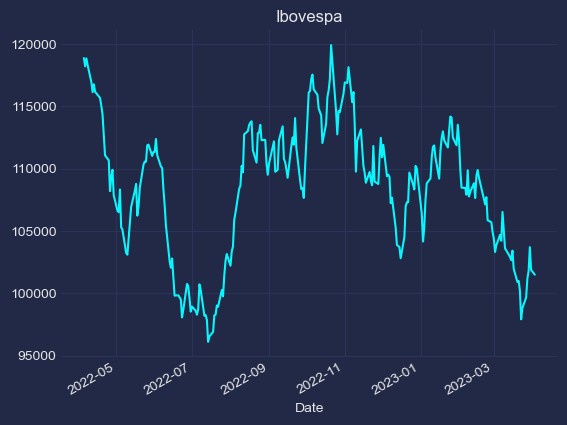

In [68]:
### criando o graficos para o ibovespa
plot.style.use('cyberpunk')

closing_data.plot(y='Ibovespa', use_index=True, legend=False)

plot.title('Ibovespa')
ibovespa_filename = 'Ibovespa.png'
plot.savefig(ibovespa_filename, dpi=300)
plot.show()

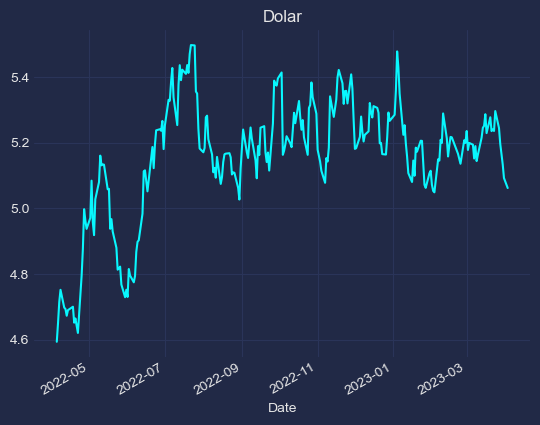

In [69]:
### grafico para o dolar
closing_data.plot(y='Dolar', use_index=True, legend=False)

plot.title('Dolar')
dolar_filename = 'Dolar.png'
plot.savefig(dolar_filename, dpi=300)
plot.show()

In [70]:
# configurando environ
import os
from dotenv import load_dotenv

load_dotenv()

email = os.environ.get('email')
password = os.environ.get('password')

In [71]:
# enviando o email
msg = EmailMessage()
msg['subject'] = 'Relatorio de fechamento do Dolar e do Ibovespa'
msg['from'] = email
msg['to'] = email

msg.set_content(
f"""
Prezado diretor, segue o relatório diario:

Ibovespa:
  Rentabilidade no ano: {ibovespa_last_year_return}%
  Rentabilidade do mês: {ibovespa_last_month_return}%
  Retorno do último dia: {ibovespa_last_day_return}%

Dolar:
  Rentabilidade no ano: {dollar_last_year_return}%
  Rentabilidade do mêss: {dollar_last_month_return}%
  Retorno do último dia: {dollar_last_day_return}%


Abs,

  Estagiário, mais trabalhador do mundo.
  
"""
)

for img in [ibovespa_filename, dolar_filename]:
    with open(img, 'rb') as file:
        msg.add_attachment(file.read(), maintype='application', subtype='png', filename=img)

    
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, password)
    smtp.send_message(msg)